In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
collumns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
targets = {0: 0, 
           1: 1,
           2: 1,
           3: 1,
           4: 1
           }
df_disease = pd.read_csv('./data/cleveland.csv')
df_disease.columns = collumns
df_disease['target'] = df_disease['target'].map(targets)
df_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


## Preproccessing

In [22]:
df_disease['target'].unique()

array([1, 0], dtype=int64)

In [23]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      300 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [24]:
df_disease['ca'] = df_disease['ca'].fillna(df_disease['ca'].mean())
df_disease['thal'] = df_disease['thal'].fillna(df_disease['thal'].mean())

## Data analysis

### distribution of target vs age

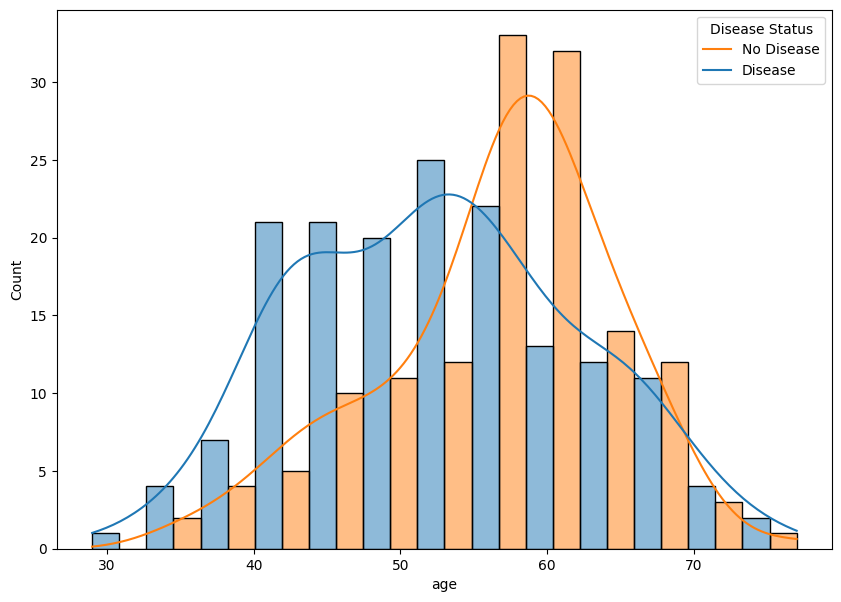

In [25]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df_disease, x='age', hue='target', kde=True, multiple="dodge")
plt.legend(title = "Disease Status", labels=['No Disease', 'Disease'])

### catplot age and target
Đồ thị thể hiện mỗi quan hệ giữa độ tuổi và khả năng bị bệnh tim

<Figure size 1000x1000 with 0 Axes>

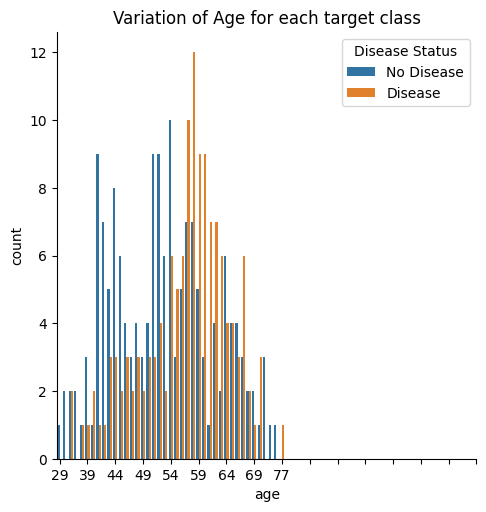

In [26]:
plt.figure(figsize=(10, 10))
sns.catplot(kind="count", data=df_disease, x='age', hue='target', legend=False)
plt.xticks(np.arange(0, 80 , 5))
plt.title('Variation of Age for each target class')
plt.legend(title="Disease Status", labels=['No Disease', 'Disease'])
plt.show()

### barplot of age vs sex with hue = target
Đồ thị thể hiện mỗi quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim

In [27]:
df_disease.loc[(df_disease["sex"] == 0) & (df_disease["target"] == 0)]['age'].mean()

54.55555555555556

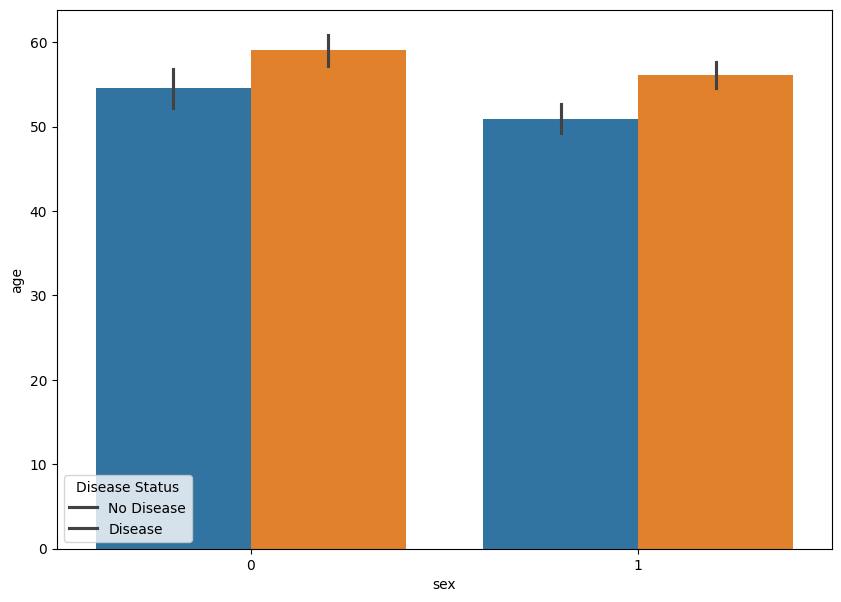

In [28]:
plt.figure(figsize=(10, 7))

# các cột biểu diễn gtri mean từng loại
sns.barplot(data=df_disease, x="sex", y="age", hue="target", legend=False)
plt.legend(title="Disease Status", labels=['No Disease', 'Disease'])
plt.show()

## Using Models 

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### KNN 

In [30]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



knn_clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'))
])

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [32]:
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for KNeighborsClassifier = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.86
Accuracy for test set for KNeighborsClassifier = 0.87


### SVM

In [33]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

svm_clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', svm.SVC(kernel="rbf", random_state=42))
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(random_state=42))])

In [35]:
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for SVM = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for SVM = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.91
Accuracy for test set for KNeighborsClassifier = 0.90


### Naive Bayes

In [47]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

naive_clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', BernoulliNB())
])

naive_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', BernoulliNB())])

In [49]:
y_train_pred = naive_clf.predict(X_train)
y_test_pred = naive_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for Naive bayes = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for Naive bayes = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for Naive bayes = 0.83
Accuracy for test set for Naive bayes = 0.84


### Decistion tree

In [75]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

decisiontree_clf = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split=2, random_state=42))
])

decisiontree_clf.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=42))])

In [80]:
y_train_pred = decisiontree_clf.predict(X_train)
y_test_pred = decisiontree_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for Decision tree = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for Decision tree = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for Decision tree = 1.00
Accuracy for test set for Decision tree = 0.74


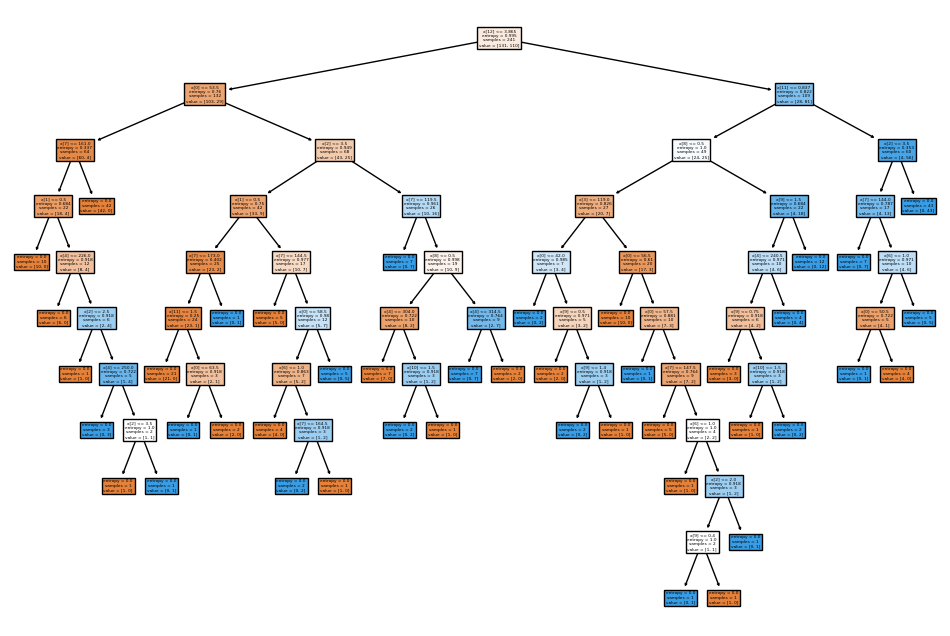

In [81]:
# Trích xuất DecisionTreeClassifier từ pipeline
decision_tree = decisiontree_clf.named_steps['classifier']

# Vẽ cây quyết định
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, filled=True)
plt.show()

### Random forest

In [76]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

randomforest_clf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(
        criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42))
])

decisiontree_clf.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=42))])

In [83]:
y_train_pred = decisiontree_clf.predict(X_train)
y_test_pred = decisiontree_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for Randomforest = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for Randomforest = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for Randomforest = 1.00
Accuracy for test set for Randomforest = 0.74


### AdaBoost

In [84]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

ada_clf = Pipeline(steps=[
    ('classifier', AdaBoostClassifier(n_estimators=10, random_state=42, learning_rate = 1, algorithm="SAMME"))
])

ada_clf.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=1,
                                    n_estimators=10, random_state=42))])

In [93]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for Adaboosting = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for Adaboosting = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for Randomforest = 0.85
Accuracy for test set for Randomforest = 0.87


### Gradient boosting

In [94]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

grad_clf = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,random_state=42))
])

grad_clf.fit(X_train, y_train)

Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=42))])

In [99]:
y_train_pred = grad_clf.predict(X_train)
y_test_pred = grad_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for GradientBoost = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for GradientBoost = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for GradientBoost = 0.99
Accuracy for test set for GradientBoost = 0.82


### XGBoost

In [100]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# create model instance
bst = XGBClassifier(n_estimators=100, learning_rate=1, objective='binary:logistic', random_state=42)
# fit model
bst.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [105]:
y_train_pred = bst.predict(X_train)
y_test_pred = bst.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for XGBoost = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for XGBoost = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for XGBoost = 1.00
Accuracy for test set for XGBoost = 0.84
